# I. 3D model

In [18]:
from simple_maize import *
from matplotlib.pylab import plot, show, xlim, ylim, axes
import numpy
import pandas
from TD_maize import maize,display,generate_mtg, illuminate,plant_irradiance, process
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## I.1 plant height

In [20]:
phytomer=16
nb_young_phy = int(round((phytomer - 1.95) / 1.84 / 1.3))
pseudostem_dist=1.4
pseudostem_height=20
stem_dist=1.
pseudostem = geometric_dist(height=pseudostem_height, nb_phy=nb_young_phy,q=pseudostem_dist)

plant_height_min=50
plant_height_max=300

stem_min = geometric_dist(height=plant_height_min - pseudostem_height,nb_phy=phytomer - nb_young_phy, q=stem_dist)
stem_max = geometric_dist(height=plant_height_max - pseudostem_height,nb_phy=phytomer - nb_young_phy, q=stem_dist)

stem_min,stem_max

([3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0],
 [28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0])

## I.2 Leaf area distribution along the stem

relative position of the leaf with highest area (rmax)

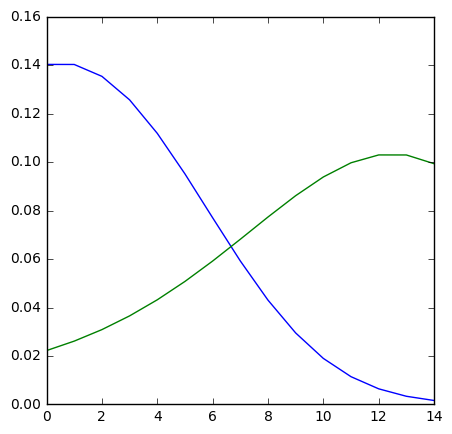

In [21]:
rmax_min=0.1
rmax_max=0.9
ymin=bell_shaped_dist(plant_area=1,nb_phy=15,rmax=rmax_min,skew=0.15)
ymax=bell_shaped_dist(plant_area=1,nb_phy=15,rmax=rmax_max,skew=0.15)
plot(ymin)
plot(ymax)

skewness of leaf area distribution (skew)

In [22]:
skew_min=0.05
skew_max=1
'...à compléter'

'...\xc3\xa0 compl\xc3\xa9ter'

## I.3 leaf shape

ratio widht/length (wl)

'...\xc3\xa0 compl\xc3\xa9ter'

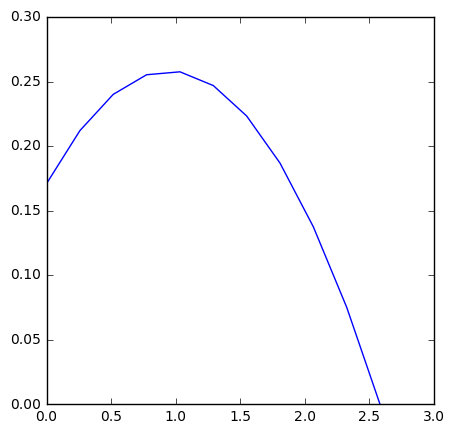

In [23]:
s,r=sr_prevot() #relative shape

leaf_area=0.5

wl_min=0.1
l_min=sqrt(leaf_area/(0.75*wl_min))
w_min=l_min*wl_min
s_min,r_min=s*l_min,r*w_min

plot(s_min,r_min)

wl_max=0.5
'...à compléter'


##  I.4 Leaf curvature

### II.4.1 Base function

In [24]:
leaf_shape_perez(nb_segment=10,insertion_angle=65, delta_angle=180, coef_curv=-0.2)

(array([ 0.        ,  0.09063078,  0.18229699,  0.27673833,  0.3746242 ,
         0.47460233,  0.5720805 ,  0.65792097,  0.71778675,  0.73396768,
         0.69299361]),
 array([ 0.        ,  0.04226183,  0.08222813,  0.11510416,  0.13555794,
         0.1376493 ,  0.11533324,  0.06403593, -0.01606455, -0.11474676,
        -0.20596696]))

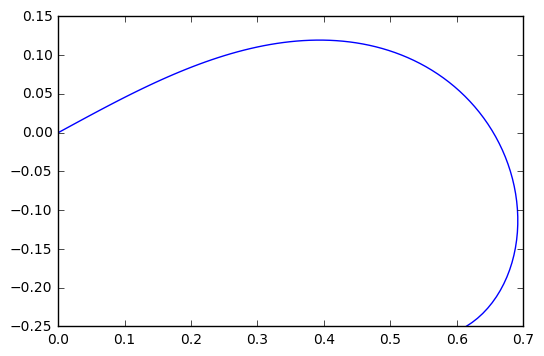

In [13]:
x,y=leaf_shape_perez(nb_segment=100,insertion_angle=65, delta_angle=180, coef_curv=-0.2)
plot(x,y)
'...faire varier les paramètres...'

### I.4.2 Variation of curvature with leaf rank

In [25]:

def leaf_shape_rank(rank=1,nb_segment=100,incli_top=50, delta_angle_top=180):
    incli_base=75
    delta_angle_base=250
    phytomer=16
    dinc = float(incli_top - incli_base) / (phytomer - 1)
    incli = incli_base + (rank -1) * dinc
    ddel = float(delta_angle_top - delta_angle_base) / (phytomer - 1)
    delta_angle = delta_angle_base + (rank - 1) * ddel
    return leaf_shape_perez(nb_segment=nb_segment,insertion_angle=incli, delta_angle=delta_angle, coef_curv=-0.2)

#### Curvature of top leaf (rank16)

Variation of inclination (incli_top)

In [26]:
rank=16
incli_top_min=5
incli_top_max=75

'...à compléter'

'...\xc3\xa0 compl\xc3\xa9ter'

Variation of curvature (delta_angle_top)

In [27]:
rank=16
delta_angle_top_min=0
delta_angle_top_max=250

'...à compléter'

'...\xc3\xa0 compl\xc3\xa9ter'

#### Curvature at a given rank (rank=5)

Variation of inclination (incli_top)

In [28]:
rank=5
incli_top_min=5
incli_top_max=75
'...à compléter'


'...\xc3\xa0 compl\xc3\xa9ter'

Variation of curvature (delta_angle_top)

In [29]:
rank=5
delta_angle_top_min=0
delta_angle_top_max=250
'...à compléter'

'...\xc3\xa0 compl\xc3\xa9ter'

## I.5 Phyllotaxis

phyllotactic_angle

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


'...repr\xc3\xa9senter la fonction avec phyllotactic_angle_max'

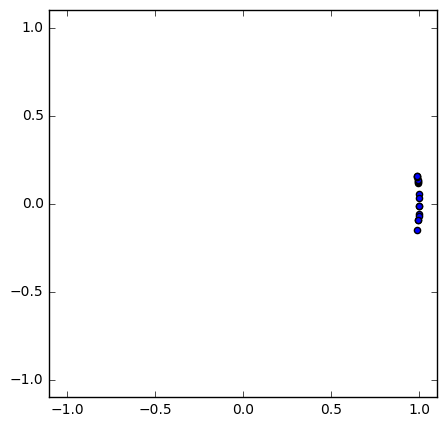

In [30]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

phytomer=16
phyllotactic_angle_min=0
phyllotactic_angle_max=180

az_min=leaf_azimuth(size=phytomer, phyllotactic_angle=phyllotactic_angle_min, phyllotactic_deviation=10, plant_orientation=0, spiral=False)*pi/180
x_min,y_min=pol2cart(rho=1,phi=az_min)

%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)
#scatter(x,y,c=numpy.arange(phytomer))
scatter(x_min,y_min,c='blue')

xlim(-1.1,1.1)
ylim(-1.1,1.1)

'...représenter la fonction avec phyllotactic_angle_max'


phyllotactic_deviation

In [31]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

phytomer=16
phyllotactic_deviation_min=0
phyllotactic_deviation_max=90


'...à compléter'

'...\xc3\xa0 compl\xc3\xa9ter'

# II. Visualisation of 3D reconstructions and estimation of light interception

## II.1 Generate the mtg

In [45]:
g=generate_mtg(plant_height=150,
                 rmax=0.6,
                 skew=0.2,
                 wl=0.2,
                 incli_base=75,
                 incli_top=50,
                 delta_angle_base=250,
                 delta_angle_top=80,
                 plant_orientation=0,
                 phyllotactic_angle=180,
                 phyllotactic_deviation=10,
                 nb_leaf_segment=10)


## II.2 Illuminate the 3D plant 

In [46]:
plant_irradiance(g, isolated=True, illuminated=None)

{'Area': 0.72703858160000001,
 'Area_leaf': 0.6965831804,
 'Ei': 0.75901083602167652,
 'Ei_leaf': 0.78094568281205889}

## II.3 Visualisation

In [47]:
%gui qt4
from TD_maize import display

Raw visualisation

In [22]:
display(g,light=False)

Visualisation with irradiance

In [48]:
display(g,light=True)

# III. Run simulation for sensitivity analysis

In [52]:
input='planMorris.csv'
output='resMorris_isolated.csv'

process(path_input=input, path_output=output, nb_process=1, isolated=True)


run_sim : 0 / 100
run_sim : 1 / 100
run_sim : 2 / 100
run_sim : 3 / 100
run_sim : 4 / 100
run_sim : 5 / 100
run_sim : 6 / 100
run_sim : 7 / 100
run_sim : 8 / 100
run_sim : 9 / 100
run_sim : 10 / 100
run_sim : 11 / 100
run_sim : 12 / 100
run_sim : 13 / 100
run_sim : 14 / 100
run_sim : 15 / 100
run_sim : 16 / 100
run_sim : 17 / 100
run_sim : 18 / 100
run_sim : 19 / 100
run_sim : 20 / 100
run_sim : 21 / 100
run_sim : 22 / 100
run_sim : 23 / 100
run_sim : 24 / 100
run_sim : 25 / 100
run_sim : 26 / 100
run_sim : 27 / 100
run_sim : 28 / 100
run_sim : 29 / 100
run_sim : 30 / 100
run_sim : 31 / 100
run_sim : 32 / 100
run_sim : 33 / 100
run_sim : 34 / 100
run_sim : 35 / 100
run_sim : 36 / 100
run_sim : 37 / 100
run_sim : 38 / 100
run_sim : 39 / 100
run_sim : 40 / 100
run_sim : 41 / 100
run_sim : 42 / 100
run_sim : 43 / 100
run_sim : 44 / 100
run_sim : 45 / 100
run_sim : 46 / 100
run_sim : 47 / 100
run_sim : 48 / 100
run_sim : 49 / 100
run_sim : 50 / 100
run_sim : 51 / 100
run_sim : 52 / 100
run

,Area,Area_leaf,Ei,Ei_leaf,delta_angle_top,incli_top,isolated,phyllotactic_angle,phyllotactic_deviation,plant_height,plant_orientation,rmax,skew,wl
0,0.780871,0.696469,0.655855,0.702329,187.5,0.00,1.0,135.0,45.0,175.0,90.0,0.7,0.2875,0.1325
1,0.780871,0.696469,0.593104,0.632916,187.5,0.00,1.0,135.0,45.0,175.0,90.0,0.7,0.2875,0.3775
2,0.780871,0.696469,0.548793,0.582775,187.5,0.00,1.0,45.0,45.0,175.0,90.0,0.7,0.2875,0.3775
3,0.780871,0.696469,0.548491,0.582645,187.5,0.00,1.0,45.0,45.0,175.0,45.0,0.7,0.2875,0.3775
4,0.780856,0.696454,0.515373,0.544334,187.5,0.00,1.0,45.0,45.0,175.0,45.0,0.3,0.2875,0.3775
5,0.780856,0.696454,0.468819,0.491686,187.5,0.00,1.0,45.0,0.0,175.0,45.0,0.3,0.2875,0.3775
6,0.780895,0.696492,0.477345,0.500981,62.5,0.00,1.0,45.0,0.0,175.0,45.0,0.3,0.2875,0.3775
7,0.780895,0.696492,0.485336,0.508118,62.5,37.50,1.0,45.0,0.0,175.0,45.0,0.3,0.2875,0.3775
8,0.837713,0.696492,0.528158,0.569448,62.5,37.50,1.0,45.0,0.0,300.0,45.0,0.3,0.2875,0.3775
9,0.837715,0.696495,0.561015,0.609161,62.5,37.50,1.0,45.0,0.0,300.0,45.0,0.3,0.7625,0.3775
